In [1]:
original_stats = {
    "Dataset1": {"ll" : -1.0903135560503194, "meu" : 1922639.5, 'nodes' : 22},
    "Dataset2": {"ll" : -1.1461735112245122, "meu" : 54.92189449375, 'nodes' : 51},
    "Dataset3": {"ll" : -1.3292497032277288, "meu" : 3.11376125, 'nodes' : 49},
    "Dataset4": {"ll" : -0.5943350928785097, "meu" : 42.60624317138454, 'nodes' : 125},
    "Dataset5": {"ll" : -0.8912294493362266, "meu" : 242.863042737567, 'nodes' : 50},
    "Dataset6": {"ll" : -1.8151637099020188, "meu" : -2803562.5, 'nodes' : 45}
}

(100000, 3)
start
done
Log Likelihood Evaluation : |██████████████████████████████████████████████████| 100.0% Complete
Average Reward Evaluation : |██████████████████████████████████████████████████| 100.0% Complete






X-Means Limit: 100000, 	Variables for splitting: 3
#Nodes:  38
log_likelihood:  -1.085894618117626
MEU:  1722313.8158882714
Average rewards:  1734820.15
Deviation:  12123.876999644132
[38]
[1722313.8158882714]






(1000000, 8)
start
done
Log Likelihood Evaluation : |██████████████████████████████████████████████████| 100.0% Complete
Average Reward Evaluation : |██████████████████████████████████████████████████| 100.0% Complete






X-Means Limit: 100000, 	Variables for splitting: 8
#Nodes:  143
log_likelihood:  -1.326788892481826
MEU:  54.89817723280146
Average rewards:  54.8730194999996
Deviation:  0.06066113337425681
[143]
[54.89817723280146]






(1000000, 9)
start
done
Log Likelihood Evaluation : |██████████████████████████████████████████████████| 100.0% Co

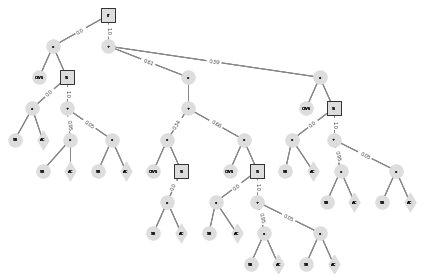

In [2]:

import numpy as np

import logging
logger = logging.getLogger(__name__)


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from os import path as pth
import sys, os
import random

from sklearn.model_selection import train_test_split
from spn.data.metaData import *
from spn.structure.StatisticalTypes import MetaType
from spn.algorithms.SPMNDataUtil import align_data
from spn.algorithms.SPMN import SPMN
from spn.algorithms.ASPMN1 import Anytime_SPMN
import matplotlib.pyplot as plt
from os import path as pth
import sys, os


datasets = ['Export_Textiles', 'Test_Strep', 'LungCancer_Staging', 'HIV_Screening', 'Computer_Diagnostician', 'Powerplant_Airpollution']
#datasets = ['Export_Textiles']
path = "test"
path = "all_max"


for dataset in datasets:
	


	partial_order = get_partial_order(dataset)
	utility_node = get_utilityNode(dataset)
	decision_nodes = get_decNode(dataset)
	feature_names = get_feature_names(dataset)
	feature_labels = get_feature_labels(dataset)
	meta_types = [MetaType.DISCRETE]*(len(feature_names)-1)+[MetaType.UTILITY]

			
	df = pd.read_csv(f"spn/data/{dataset}/{dataset}_new.tsv", sep='\t')

	df1, column_titles = align_data(df, partial_order)  # aligns data in partial order sequence
	col_ind = column_titles.index(utility_node[0]) 
	df_without_utility = df1.drop(df1.columns[col_ind], axis=1)
	from sklearn.preprocessing import LabelEncoder
	# transform categorical string values to categorical numerical values
	df_without_utility_categorical = df_without_utility.apply(LabelEncoder().fit_transform)  
	df_utility = df1.iloc[:, col_ind]
	df = pd.concat([df_without_utility_categorical, df_utility], axis=1, sort=False)

	data = df.values
	#train, test = train_test_split(data, test_size=0.9, shuffle=True)
	train, test = data, random.sample(list(data), 10000)


	
	#train, test = data[:int(data.shape[0]*0.7)], data[int(data.shape[0]*0.7):]
	print(train.shape)
	#print(test.shape)


	
	aspmn = Anytime_SPMN(dataset, path, partial_order , decision_nodes, utility_node, feature_names, feature_labels, meta_types, cluster_by_curr_information_set=False, util_to_bin = False)
	aspmn.learn_aspmn(train, test)
